In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

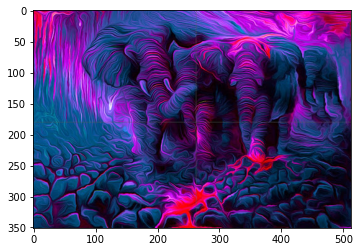

In [2]:
img = cv2.imread("elephant.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
print(img.shape)

(351, 512, 3)


In [5]:
all_pixels = img.reshape((351*512 , 3))
print(all_pixels.shape)

(179712, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors = 3
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=3)

In [8]:
centers = km.cluster_centers_


In [9]:
centers = np.array(centers, dtype = 'uint8')

In [10]:
centers

array([[167,  31, 181],
       [ 25,  16,  52],
       [ 41,  63, 135]], dtype=uint8)

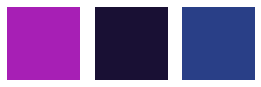

In [12]:
i= 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #colors watch
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    
plt.show()

In [13]:
new_img = np.zeros((img.shape[0]*img.shape[1],3), dtype = 'uint8')
print(new_img.shape)

(179712, 3)


In [14]:
a = km.labels_
print(len(a))

179712


In [15]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape(img.shape)
print(new_img.shape)

(351, 512, 3)


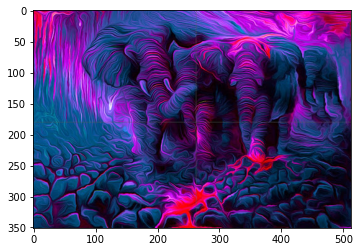

In [16]:
plt.imshow(img)
plt.show()

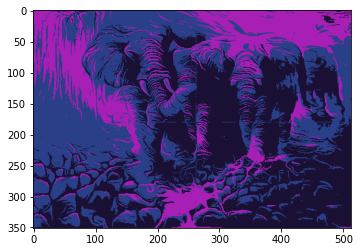

In [17]:
plt.imshow(new_img)
plt.show()